In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import miceforest as mf
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import geopandas



dados = pd.read_csv("HNP_StatsData.csv")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125020 entries, 0 to 125019
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    125020 non-null  object 
 1   Country Code    125020 non-null  object 
 2   Indicator Name  125020 non-null  object 
 3   Indicator Code  125020 non-null  object 
 4   1960            41825 non-null   float64
 5   1961            42373 non-null   float64
 6   1962            42462 non-null   float64
 7   1963            42504 non-null   float64
 8   1964            42563 non-null   float64
 9   1965            42713 non-null   float64
 10  1966            42657 non-null   float64
 11  1967            42702 non-null   float64
 12  1968            42769 non-null   float64
 13  1969            42859 non-null   float64
 14  1970            44270 non-null   float64
 15  1971            44991 non-null   float64
 16  1972            45053 non-null   float64
 17  1973      

In [4]:
# Indicadores Únicos
selecao_unicos = dados['Indicator Name'].unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15-49) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 00, female, interpolated',
       'Age population, age 00, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age population, age 02, female, interpolated',
       'Age population, age 02, male, interpolated',
       'Age population, age 03, female, interpolated',
       'Age population, age 03, male, interpolated',
       'Age population, age 04, female, interpolated

In [5]:
# Selecionando Indicadores Únicos
selecao_geral = ["Birth rate, crude (per 1,000 people)",
"Capital health expenditure (% of GDP)",
"Death rate, crude (per 1,000 people)",
"Domestic general government health expenditure (% of GDP)",
"GNI per capita, Atlas method (current US$)",
"Immunization, BCG (% of one-year-old children)",
"Immunization, DPT (% of children ages 12-23 months)",
"Immunization, HepB3 (% of one-year-old children)",
"Immunization, Hib3 (% of children ages 12-23 months)",
"Immunization, measles (% of children ages 12-23 months)",
"Immunization, measles second dose (% of children by the nationally recommended age)",
"Immunization, Pol3 (% of one-year-old children)",
"Incidence of malaria (per 1,000 population at risk)",
"Incidence of tuberculosis (per 100,000 people)",
"Life expectancy at birth, total (years)",
"Low-birthweight babies (% of births)",
"Newborns protected against tetanus (%)",
"Number of people who are undernourished",
"Number of under-five deaths",
"Population growth (annual %)",
"Population, total",
"Public spending on education, total (% of GDP)",
"Prevalence of HIV, total (% of population ages 15-49)",
"Prevalence of hypertension (% of adults ages 30-79)",
"Prevalence of current tobacco use (% of adults)",
"Prevalence of undernourishment (% of population)",
"School enrollment, primary (% gross)",
"School enrollment, secondary (% gross)",
"School enrollment, tertiary (% gross)",
"Sex ratio at birth (male births per female births)",
"Suicide mortality rate (per 100,000 population)",
"Tuberculosis case detection rate (%, all forms)",
"UHC service coverage index",
"Unemployment, total (% of total labor force)"
]

In [10]:
# Criando DF para o ano de 2019
info_geral = ["Country Name", "Country Code", "Indicator Name", "2019"]
data_geral = dados[info_geral]
data_geral

,Country Name,Country Code,Indicator Name,2019
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",99.085572
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,NaN
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,NaN
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,NaN
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,NaN
...,...,...,...,...
125015,Zimbabwe,ZWE,Wanted fertility rate (births per woman),NaN
125016,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,5.400000
125017,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,33.700000
125018,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,60.300000


In [11]:
indicadores_gerais = data_geral["Indicator Name"].isin(selecao_geral)
ind_geral = data_geral[indicadores_gerais]
df_geral = pd.DataFrame(ind_geral)
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9044 entries, 66 to 125007
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    9044 non-null   object 
 1   Country Code    9044 non-null   object 
 2   Indicator Name  9044 non-null   object 
 3   2019            7280 non-null   float64
dtypes: float64(1), object(3)
memory usage: 353.3+ KB


In [12]:
#Removendo Macroregiões e Uniões
paises_limpo = ['Africa Eastern and Southern',
                            'Africa Western and Central',
                            'Arab World', 
                            'Caribbean small states',
                            'Central Europe and the Baltics', 
                            'Early-demographic dividend',
                            'East Asia & Pacific',
                            'East Asia & Pacific (excluding high income)',
                            'East Asia & Pacific (IDA & IBRD countries)', 
                            'Euro area',
                            'Europe & Central Asia',
                            'Europe & Central Asia (excluding high income)',
                            'Europe & Central Asia (IDA & IBRD countries)', 
                            'European Union',
                            'Fragile and conflict affected situations',
                            'Heavily indebted poor countries (HIPC)', 
                            'High income',
                            'IBRD only', 
                            'IDA & IBRD total', 
                            'IDA blend', 
                            'IDA only',
                            'IDA total', 
                            'Late-demographic dividend',
                            'Latin America & Caribbean',
                            'Latin America & Caribbean (excluding high income)',
                            'Latin America & the Caribbean (IDA & IBRD countries)',
                            'Least developed countries: UN classification',
                            'Low & middle income', 
                            'Low income', 
                            'Lower middle income',
                            'Middle East & North Africa',
                            'Middle East & North Africa (excluding high income)',
                            'Middle East & North Africa (IDA & IBRD countries)',
                            'Middle income', 
                            'North America', 'Not classified', 
                            'OECD members',
                            'Other small states', 
                            'Pacific island small states',
                            'Post-demographic dividend', 
                            'Pre-demographic dividend',
                            'Small states', 
                            'South Asia', 
                            'South Asia (IDA & IBRD)',
                            'Sub-Saharan Africa', 
                            'Sub-Saharan Africa (excluding high income)',
                            'Sub-Saharan Africa (IDA & IBRD countries)', 
                            'Upper middle income',
                            'World'
                           ]

In [13]:
relatorio = list()
for pais in paises:
    linha_relatorio = [pais]
    for indicador in selecao_geral:
        df_temp = dados[(dados["Country Name"] == pais) & (dados["Indicator Name"] == indicador)]
        valor = df_temp.iloc[0]["2019"]
        linha_relatorio.append(valor)
    relatorio.append(linha_relatorio)

In [14]:
colunas = ["Pais"]
colunas.extend(selecao_geral)
df_ind_2019 = pd.DataFrame(relatorio, columns=colunas)

In [15]:
# Excluindo Indicadores com muitos dados ausentes
df_ind_2019.dropna(axis=1,thresh=200, inplace=True)

,Pais,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Domestic general government health expenditure (% of GDP),"GNI per capita, Atlas method (current US$)","Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, measles second dose (% of children by the nationally recommended age)",...,"Population, total",Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),"School enrollment, primary (% gross)",Sex ratio at birth (male births per female births),"Suicide mortality rate (per 100,000 population)","Tuberculosis case detection rate (%, all forms)",UHC service coverage index,"Unemployment, total (% of total labor force)"
0,Africa Eastern and Southern,34.341450,7.434644,2.789083,1503.605834,79.492581,79.493213,79.493213,74.861776,41.139192,...,667242986.0,35.079081,12.451462,24.374440,105.208809,1.032235,8.024906,NaN,NaN,7.121663
1,Africa Western and Central,37.027834,10.488748,0.752566,1703.266895,72.257344,72.258016,72.258016,65.751765,20.805713,...,454306063.0,36.455108,6.352941,12.824235,89.480888,1.036831,5.420255,NaN,NaN,4.261414
2,Arab World,24.598620,5.198866,2.595131,6462.604768,86.180941,86.144765,86.199008,84.731789,76.460907,...,441467739.0,38.019182,20.690081,12.041850,90.339828,1.050001,4.162428,NaN,NaN,10.165158
3,Caribbean small states,13.931756,7.485220,3.375015,10110.971677,93.502882,93.556556,93.556556,92.083605,84.721678,...,7424102.0,43.625486,NaN,7.648140,97.681824,1.039697,10.047851,NaN,NaN,6.844145
4,Central Europe and the Baltics,9.909592,11.981800,4.967848,15930.551660,94.058794,82.337418,93.999646,93.171442,89.629469,...,102398537.0,47.177888,29.083999,2.524278,95.518440,1.056207,12.521257,NaN,NaN,3.780901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),12.300000,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106669.0,NaN,NaN,NaN,NaN,1.039000,NaN,NaN,NaN,12.350000
262,West Bank and Gaza,29.466000,3.225000,NaN,4270.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,4685306.0,39.100000,NaN,NaN,96.062424,1.051000,NaN,80.0,NaN,25.340000
263,"Yemen, Rep.",31.778000,6.416000,NaN,NaN,73.000000,73.000000,73.000000,67.000000,46.000000,...,31546691.0,29.300000,20.500000,38.900000,NaN,1.059000,5.800000,68.0,42.0,12.978000
264,Zambia,35.462000,6.571000,2.136501,1390.000000,88.000000,88.000000,88.000000,93.000000,66.000000,...,18380477.0,32.300000,14.600000,29.200000,96.249168,1.011000,7.300000,59.0,54.0,5.540000


In [25]:
# Normalizando o Dataframe
scaler = MinMaxScaler()
minmax = scaler.fit_transform(df_ind_2019.iloc[:, 1:])
df_norm_2019 = pd.DataFrame(data=minmax, columns=df_ind_2019.iloc[:, 1:].columns)
df_norm_2019.head()

,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Domestic general government health expenditure (% of GDP),"GNI per capita, Atlas method (current US$)","Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, measles second dose (% of children by the nationally recommended age)","Immunization, Pol3 (% of one-year-old children)",...,"Population, total",Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),"School enrollment, primary (% gross)",Sex ratio at birth (male births per female births),"Suicide mortality rate (per 100,000 population)","Tuberculosis case detection rate (%, all forms)",UHC service coverage index,"Unemployment, total (% of total labor force)"
0,0.711766,0.444114,0.156364,0.010881,0.695197,0.695206,0.718452,0.634269,0.390939,0.668785,...,0.086186,0.402775,0.194111,0.442802,0.550699,0.112953,0.105901,NaN,NaN,0.267849
1,0.778994,0.654611,0.022691,0.012587,0.582146,0.582157,0.614025,0.496239,0.176902,0.521650,...,0.058681,0.441320,0.060372,0.208993,0.390333,0.137401,0.069726,NaN,NaN,0.158742
2,0.467945,0.290018,0.143633,0.053247,0.799702,0.799137,0.815239,0.783815,0.762746,0.774943,...,0.057023,0.485131,0.374782,0.193155,0.399091,0.207453,0.052256,NaN,NaN,0.383947
3,0.201000,0.447599,0.194824,0.084417,0.914108,0.914946,0.921433,0.895206,0.849702,0.897022,...,0.000958,0.642170,NaN,0.104213,0.473952,0.152645,0.133998,NaN,NaN,0.257263
4,0.100343,0.757516,0.299374,0.134135,0.922794,0.739647,0.927828,0.911689,0.901363,0.860329,...,0.013225,0.741678,0.558860,0.000491,0.451893,0.240464,0.168351,NaN,NaN,0.140412


In [27]:
pd.set_option('display.max_columns', None)
paises_sem_grupo = [x for x in paises if x not in paises_limpo]

In [28]:
#Substituindo caracteres especiais
df_mundo = df_norm_2019[df_ind_2019['Pais'].isin(paises_sem_grupo)]
df_mundo1 = df_mundo.copy()
df_mundo1.columns = df_mundo1.columns.str.replace(',', '')
df_mundo1.columns = df_mundo1.columns.str.replace(':', '')

,Birth rate crude (per 1000 people),Death rate crude (per 1000 people),Domestic general government health expenditure (% of GDP),GNI per capita Atlas method (current US$),Immunization DPT (% of children ages 12-23 months),Immunization HepB3 (% of one-year-old children),Immunization Hib3 (% of children ages 12-23 months),Immunization measles (% of children ages 12-23 months),Immunization measles second dose (% of children by the nationally recommended age),Immunization Pol3 (% of one-year-old children),Incidence of tuberculosis (per 100000 people),Life expectancy at birth total (years),Number of under-five deaths,Population growth (annual %),Population total,Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),School enrollment primary (% gross),Sex ratio at birth (male births per female births),Suicide mortality rate (per 100000 population),Tuberculosis case detection rate (% all forms),UHC service coverage index,Unemployment total (% of total labor force)
49,0.764934,0.399752,0.005920,0.002478,0.578125,0.578125,0.610301,0.469697,0.389474,0.578947,0.288991,0.330178,1.506658e-02,0.850384,0.004877,0.546218,0.442982,0.493927,0.599628,0.223404,0.051389,0.571429,0.246154,0.419035
50,0.111189,0.516162,0.161498,0.042717,1.000000,1.000000,1.000000,0.939394,0.968421,1.000000,0.024465,0.817217,5.303754e-05,0.362619,0.000367,0.591036,0.425439,0.032389,0.541537,0.372340,0.054167,0.726190,0.584615,0.433721
51,0.435396,0.234406,0.240212,0.032636,0.828125,0.828125,0.841234,0.712121,0.757895,0.807018,0.093272,0.730203,4.380452e-03,0.694002,0.005515,0.434174,0.381579,0.000000,0.576866,0.186170,0.029167,0.654762,0.738462,0.396529
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003670,NaN,NaN,0.087891,0.000005,NaN,NaN,NaN,NaN,0.260638,NaN,0.726190,NaN,NaN
53,0.027528,0.200496,0.321697,0.395557,1.000000,0.984375,0.985567,1.000000,0.947368,1.000000,0.011468,NaN,3.735038e-07,0.682014,0.000008,0.288515,0.622807,NaN,0.389028,0.276596,NaN,0.726190,0.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.160164,0.496864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.829188,NaN,0.379477,0.000012,NaN,NaN,NaN,NaN,0.148936,NaN,NaN,NaN,0.467290
262,0.589754,0.153973,NaN,0.034515,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000810,0.691994,4.297161e-04,0.792349,0.000604,0.515406,NaN,NaN,0.457440,0.212766,NaN,0.642857,NaN,0.962808
263,0.647614,0.373906,NaN,NaN,0.593750,0.593750,0.624734,0.515152,0.442105,0.438596,0.073394,0.377497,1.136441e-02,0.779832,0.004073,0.240896,0.370614,0.736842,NaN,0.255319,0.075000,0.500000,0.246154,0.491245
264,0.739808,0.384589,0.113530,0.009910,0.828125,0.828125,0.841234,0.909091,0.652632,0.824561,0.509174,0.306255,7.432912e-03,0.864878,0.002373,0.324930,0.241228,0.540486,0.459344,0.000000,0.095833,0.392857,0.430769,0.207515


In [29]:
#Aplicando o MICEForest

#Kernel
kds = mf.ImputationKernel(df_mundo1, save_all_iterations=True, random_state=42)

kds.mice(50)

#df_completa
df_completa = kds.complete_data()
df_completa

,Birth rate crude (per 1000 people),Death rate crude (per 1000 people),Domestic general government health expenditure (% of GDP),GNI per capita Atlas method (current US$),Immunization DPT (% of children ages 12-23 months),Immunization HepB3 (% of one-year-old children),Immunization Hib3 (% of children ages 12-23 months),Immunization measles (% of children ages 12-23 months),Immunization measles second dose (% of children by the nationally recommended age),Immunization Pol3 (% of one-year-old children),Incidence of tuberculosis (per 100000 people),Life expectancy at birth total (years),Number of under-five deaths,Population growth (annual %),Population total,Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),School enrollment primary (% gross),Sex ratio at birth (male births per female births),Suicide mortality rate (per 100000 population),Tuberculosis case detection rate (% all forms),UHC service coverage index,Unemployment total (% of total labor force)
49,0.764934,0.399752,0.005920,0.002478,0.578125,0.578125,0.610301,0.469697,0.389474,0.578947,0.288991,0.330178,1.506658e-02,0.850384,0.004877,0.546218,0.442982,0.493927,0.599628,0.223404,0.051389,0.571429,0.246154,0.419035
50,0.111189,0.516162,0.161498,0.042717,1.000000,1.000000,1.000000,0.939394,0.968421,1.000000,0.024465,0.817217,5.303754e-05,0.362619,0.000367,0.591036,0.425439,0.032389,0.541537,0.372340,0.054167,0.726190,0.584615,0.433721
51,0.435396,0.234406,0.240212,0.032636,0.828125,0.828125,0.841234,0.712121,0.757895,0.807018,0.093272,0.730203,4.380452e-03,0.694002,0.005515,0.434174,0.381579,0.000000,0.576866,0.186170,0.029167,0.654762,0.738462,0.396529
52,0.115118,0.572679,0.436629,0.153268,0.500000,0.546875,0.552567,0.636364,0.673684,0.561404,0.003670,0.725416,1.307263e-06,0.087891,0.000005,0.605042,0.543860,0.016194,0.871442,0.260638,0.248611,0.726190,0.738462,0.521877
53,0.027528,0.200496,0.321697,0.395557,1.000000,0.984375,0.985567,1.000000,0.947368,1.000000,0.011468,0.801903,3.735038e-07,0.682014,0.000008,0.288515,0.622807,0.034413,0.389028,0.276596,0.158333,0.726190,0.800000,0.345108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.160164,0.496864,0.240212,0.228364,0.906250,0.906250,0.913400,0.924242,0.926316,0.894737,0.007187,0.829188,1.867519e-06,0.379477,0.000012,0.666667,0.377193,0.016194,0.549539,0.148936,0.104167,0.726190,0.784615,0.467290
262,0.589754,0.153973,0.082885,0.034515,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000810,0.691994,4.297161e-04,0.792349,0.000604,0.515406,0.414474,0.048583,0.457440,0.212766,0.062500,0.642857,0.523077,0.962808
263,0.647614,0.373906,0.045682,0.008287,0.593750,0.593750,0.624734,0.515152,0.442105,0.438596,0.073394,0.377497,1.136441e-02,0.779832,0.004073,0.240896,0.370614,0.736842,0.549253,0.255319,0.075000,0.500000,0.246154,0.491245
264,0.739808,0.384589,0.113530,0.009910,0.828125,0.828125,0.841234,0.909091,0.652632,0.824561,0.509174,0.306255,7.432912e-03,0.864878,0.002373,0.324930,0.241228,0.540486,0.459344,0.000000,0.095833,0.392857,0.430769,0.207515


In [33]:
import warnings
warnings.filterwarnings('ignore')
wcss = list()

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(df_completa)
    wcss.append(kmeans.inertia_)

(array([ 60.,  80., 100., 120., 140., 160., 180., 200.]),
 [Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180'),
  Text(0, 200.0, '200')])

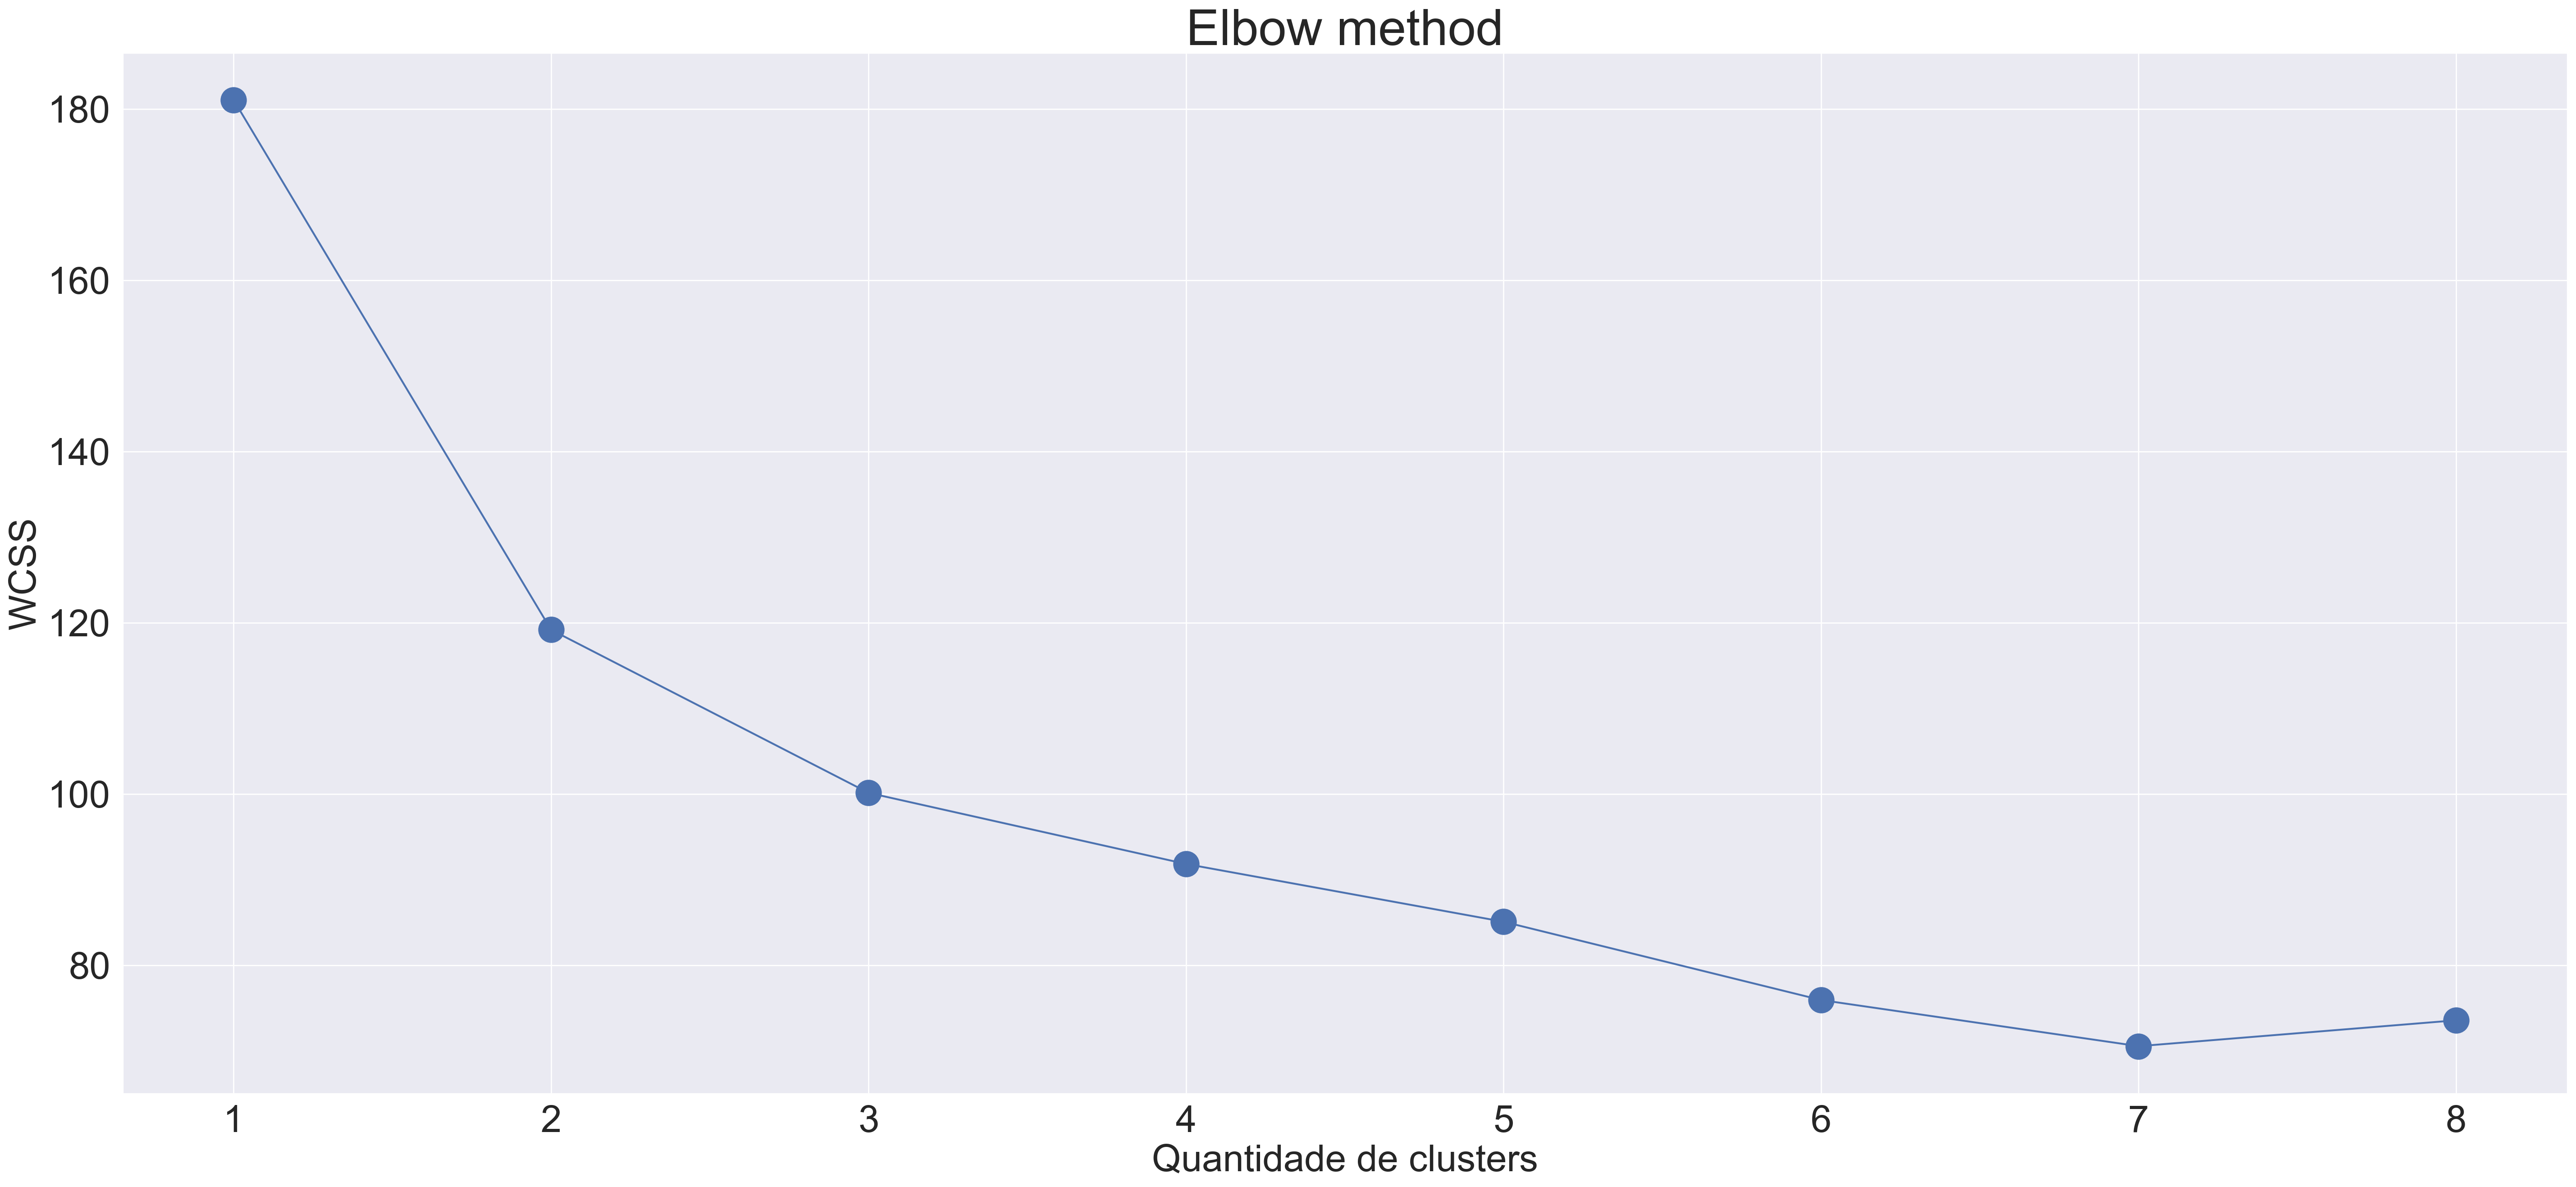

In [34]:
# Aplicando método do cotovelo para direcionar o número de clusters
plt.figure(dpi=200)
plt.plot([i for i in range(1,9)], wcss, '-o', markersize=20)
plt.title('Elbow method', fontsize=40)
plt.xlabel('Quantidade de clusters', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('WCSS', fontsize=30)
plt.yticks(fontsize=30)

In [39]:
paises_id = pd.read_csv('HNP_StatsCountry.csv')
paises_id

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2013,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Estimate,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,Original chained constant price data are resca...,2008.0,Value added at basic prices (VAB),IDA,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,Actual,NaN,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2019/20","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
261,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,The World Bank systematically assesses the app...,Middle East & North Africa,Low income,RY,1990,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM5 (Converted into BPM6 by IMF),Estimate,Special trade system,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2015.0,NaN
262,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2015,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2016","Expenditure survey/budget survey (ES/BS), 2014/1

In [41]:
# Adicionando o nome do país ao Dataframe
df_completa_paises = df_completa.copy()
df_completa_paises['Country_name'] = paises_sem_grupo
df_completa_paises

,Birth rate crude (per 1000 people),Death rate crude (per 1000 people),Domestic general government health expenditure (% of GDP),GNI per capita Atlas method (current US$),Immunization DPT (% of children ages 12-23 months),Immunization HepB3 (% of one-year-old children),Immunization Hib3 (% of children ages 12-23 months),Immunization measles (% of children ages 12-23 months),Immunization measles second dose (% of children by the nationally recommended age),Immunization Pol3 (% of one-year-old children),Incidence of tuberculosis (per 100000 people),Life expectancy at birth total (years),Number of under-five deaths,Population growth (annual %),Population total,Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),School enrollment primary (% gross),Sex ratio at birth (male births per female births),Suicide mortality rate (per 100000 population),Tuberculosis case detection rate (% all forms),UHC service coverage index,Unemployment total (% of total labor force),cluster,Country_name
49,0.764934,0.399752,0.005920,0.002478,0.578125,0.578125,0.610301,0.469697,0.389474,0.578947,0.288991,0.330178,1.506658e-02,0.850384,0.004877,0.546218,0.442982,0.493927,0.599628,0.223404,0.051389,0.571429,0.246154,0.419035,1,Afghanistan
50,0.111189,0.516162,0.161498,0.042717,1.000000,1.000000,1.000000,0.939394,0.968421,1.000000,0.024465,0.817217,5.303754e-05,0.362619,0.000367,0.591036,0.425439,0.032389,0.541537,0.372340,0.054167,0.726190,0.584615,0.433721,0,Albania
51,0.435396,0.234406,0.240212,0.032636,0.828125,0.828125,0.841234,0.712121,0.757895,0.807018,0.093272,0.730203,4.380452e-03,0.694002,0.005515,0.434174,0.381579,0.000000,0.576866,0.186170,0.029167,0.654762,0.738462,0.396529,0,Algeria
52,0.115118,0.572679,0.436629,0.153268,0.500000,0.546875,0.552567,0.636364,0.673684,0.561404,0.003670,0.725416,1.307263e-06,0.087891,0.000005,0.605042,0.543860,0.016194,0.871442,0.260638,0.248611,0.726190,0.738462,0.521877,0,American Samoa
53,0.027528,0.200496,0.321697,0.395557,1.000000,0.984375,0.985567,1.000000,0.947368,1.000000,0.011468,0.801903,3.735038e-07,0.682014,0.000008,0.288515,0.622807,0.034413,0.389028,0.276596,0.158333,0.726190,0.800000,0.345108,0,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.160164,0.496864,0.240212,0.228364,0.906250,0.906250,0.913400,0.924242,0.926316,0.894737,0.007187,0.829188,1.867519e-06,0.379477,0.000012,0.666667,0.377193,0.016194,0.549539,0.148936,0.104167,0.726190,0.784615,0.467290,0,Virgin Islands (U.S.)
262,0.589754,0.153973,0.082885,0.034515,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000810,0.691994,4.297161e-04,0.792349,0.000604,0.515406,0.414474,0.048583,0.457440,0.212766,0.062500,0.642857,0.523077,0.962808,0,West Bank and Gaza
263,0.647614,0.373906,0.045682,0.008287,0.593750,0.593750,0.624734,0.515152,0.442105,0.438596,0.073394,0.377497,1.136441e-02,0.779832,0.004073,0.240896,0.370614,0.736842,0.549253,0.255319,0.075000,0.500000,0.246154,0.491245,1,"Yemen, Rep."
264,0.739808,0.384589,0.113530,0.009910,0.828125,0.828125,0.841234,0.909091,0.652632,0.824561,0.509174,0.306255,7.432912e-03,0.864878,0.002373,0.324930,0.241228,0.540486,0.459344,0.000000,0.095833,0.392857,0.430769,0.207515,1,Zambia


In [42]:
# Pegando informações do Geopandas
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [77]:
#Aplicando o Kmeans para 5 Clusters
kmeans = KMeans(n_clusters=5, random_state=5)
kmeans.fit(df_completa)
kmeans.labels_
df_completa['cluster'] = kmeans.labels_

In [78]:
df_completa.groupby('cluster').mean()

,Birth rate crude (per 1000 people),Death rate crude (per 1000 people),Domestic general government health expenditure (% of GDP),GNI per capita Atlas method (current US$),Immunization DPT (% of children ages 12-23 months),Immunization HepB3 (% of one-year-old children),Immunization Hib3 (% of children ages 12-23 months),Immunization measles (% of children ages 12-23 months),Immunization measles second dose (% of children by the nationally recommended age),Immunization Pol3 (% of one-year-old children),Incidence of tuberculosis (per 100000 people),Life expectancy at birth total (years),Number of under-five deaths,Population growth (annual %),Population total,Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),School enrollment primary (% gross),Sex ratio at birth (male births per female births),Suicide mortality rate (per 100000 population),Tuberculosis case detection rate (% all forms),UHC service coverage index,Unemployment total (% of total labor force)
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,0.101814,0.682909,0.311918,0.138322,0.871976,0.855343,0.873825,0.842131,0.885229,0.855122,0.030640,0.744257,0.000166,0.378938,0.001649,0.652571,0.575976,0.003396,0.523721,0.257550,0.194355,0.730031,0.799007,0.317766
1,0.274763,0.358109,0.195534,0.090996,0.929276,0.924959,0.933341,0.937400,0.907341,0.926362,0.111517,0.664549,0.003557,0.563197,0.007325,0.518650,0.347703,0.076817,0.523122,0.243701,0.099251,0.663221,0.697166,0.288156
2,0.573761,0.419904,0.124118,0.020448,0.812855,0.816051,0.820240,0.790978,0.682775,0.784689,0.317306,0.398340,0.006990,0.703786,0.003629,0.445442,0.298943,0.272911,0.524497,0.158003,0.145013,0.474838,0.377622,0.304206
3,0.651220,0.504292,0.057788,0.042007,0.417668,0.411659,0.458751,0.421911,0.243725,0.334008,0.332980,0.318176,0.015796,0.779543,0.003685,0.441284,0.240132,0.456011,0.488747,0.156710,0.083600,0.412546,0.272781,0.292272
4,0.108567,0.465550,0.384952,0.467070,0.908594,0.876563,0.911957,0.906439,0.885526,0.898246,0.021510,0.911807,0.000316,0.550945,0.003335,0.269748,0.421711,0.009160,0.516582,0.259840,0.165729,0.730357,0.904231,0.229117


In [79]:
df_completa['cluster'].value_counts()

cluster
1    76
2    44
4    40
0    31
3    26
Name: count, dtype: int64

In [80]:
df_completa_paises = df_completa.copy()
df_completa_paises['Country_name'] = paises_sem_grupo

In [81]:
# Substituindo alguns nome e adicionando código dos países
pd.set_option('display.max_rows', None)

mapeamento_codigo_pais1 = dict(zip(world['iso_a3'], paises_id['Country Code']))
mapeamento_codigo_pais2 = dict(zip(world['iso_a3'], paises_id['Country Code']))

# Adicionar a coluna de código do país ao DataFrame com base no nome do país
df_completa_paises['iso_alfa'] = df_completa_paises['Country_name'].map(mapeamento_codigo_pais1)
df_completa_paises['iso_alfa'] = df_completa_paises['Country_name'].fillna(mapeamento_codigo_pais2)
df_completa_paises.loc[df_completa_paises['iso_alfa'] == 'Turkiye', 'iso_alfa'] = 'Turkey'

df_completa_paises

,Birth rate crude (per 1000 people),Death rate crude (per 1000 people),Domestic general government health expenditure (% of GDP),GNI per capita Atlas method (current US$),Immunization DPT (% of children ages 12-23 months),Immunization HepB3 (% of one-year-old children),Immunization Hib3 (% of children ages 12-23 months),Immunization measles (% of children ages 12-23 months),Immunization measles second dose (% of children by the nationally recommended age),Immunization Pol3 (% of one-year-old children),Incidence of tuberculosis (per 100000 people),Life expectancy at birth total (years),Number of under-five deaths,Population growth (annual %),Population total,Prevalence of hypertension (% of adults ages 30-79),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),School enrollment primary (% gross),Sex ratio at birth (male births per female births),Suicide mortality rate (per 100000 population),Tuberculosis case detection rate (% all forms),UHC service coverage index,Unemployment total (% of total labor force),cluster,Country_name,iso_alfa
49,0.764934,0.399752,0.005920,0.002478,0.578125,0.578125,0.610301,0.469697,0.389474,0.578947,0.288991,0.330178,1.506658e-02,0.850384,4.877253e-03,0.546218,0.442982,0.493927,0.599628,0.223404,0.051389,0.571429,0.246154,0.419035,3,Afghanistan,Afghanistan
50,0.111189,0.516162,0.161498,0.042717,1.000000,1.000000,1.000000,0.939394,0.968421,1.000000,0.024465,0.817217,5.303754e-05,0.362619,3.672593e-04,0.591036,0.425439,0.032389,0.541537,0.372340,0.054167,0.726190,0.584615,0.433721,1,Albania,Albania
51,0.435396,0.234406,0.240212,0.032636,0.828125,0.828125,0.841234,0.712121,0.757895,0.807018,0.093272,0.730203,4.380452e-03,0.694002,5.514817e-03,0.434174,0.381579,0.000000,0.576866,0.186170,0.029167,0.654762,0.738462,0.396529,1,Algeria,Algeria
52,0.115118,0.572679,0.436629,0.153268,0.500000,0.546875,0.552567,0.636364,0.673684,0.561404,0.003670,0.725416,1.307263e-06,0.087891,4.697250e-06,0.605042,0.543860,0.016194,0.871442,0.260638,0.248611,0.726190,0.738462,0.521877,0,American Samoa,American Samoa
53,0.027528,0.200496,0.321697,0.395557,1.000000,0.984375,0.985567,1.000000,0.947368,1.000000,0.011468,0.801903,3.735038e-07,0.682014,8.446008e-06,0.288515,0.622807,0.034413,0.389028,0.276596,0.158333,0.726190,0.800000,0.345108,4,Andorra,Andorra
54,0.846493,0.470053,0.045133,0.016062,0.343750,0.343750,0.393801,0.272727,0.305263,0.245614,0.536697,0.295564,1.737782e-02,0.921584,4.177683e-03,0.504202,0.175439,0.303644,0.373015,0.079787,0.079167,0.464286,0.200000,0.357849,3,Angola,Angola
55,0.139768,0.335929,0.141139,0.151815,0.937500,1.000000,1.000000,0.909091,0.800000,0.929825,0.000000,0.798903,1.307263e-06,0.503110,1.048353e-05,0.613445,0.094298,0.070850,0.621190,0.111702,0.000000,0.630952,0.753846,0.572573,1,Antigua and Barbuda,Antigua and Barbuda
56,0.222303,0.455510,0.371023,0.093891,0.750000,0.750000,0.769067,0.803030,0.842105,0.719298,0.044343,0.755303,1.079052e-03,0.570245,5.803297e-03,0.750700,0.467105,0.018219,0.613473,0.218085,0.111111,0.726190,0.800000,0.371543,0,Argentina,Argentina
57,0.174979,0.597629,0.065953,0.039727,0.890625,0.890625,0.898967,0.939394,0.968421,0.912281,0.039755,0.698130,8.291784e-05,0.342424,3.629207e-04,0.745098,0.486842,0.000000,0.470295,0.494681,0.040278,0.690476,0.676923,0.461568,1,Armenia,Armenia
58,0.081033,0.536701,0.183015,0.249637,0.828125,0.828125,0.841234,0.833333,0.863158,0.807018,0.003364,0.723199,7.133922e-05,0.491046,1.233388e-05,0.591036,0.381579,0.000000,0.541985,0.175532,0.126389,0.726190,0.815385,0.345108,0,Aruba,Aruba


In [82]:
fig = px.choropleth(df_completa_paises,
                    locationmode="country names",
                    locations="iso_alfa",
                    color="cluster",
                    range_color=(0, 4))
fig.show()

In [83]:
# Desnormalizando dados
df_desnorm = df_completa_paises.iloc[:, :-3]
df_categorica = df_completa_paises.iloc[:, -3:]
df_categorica.reset_index(drop=True, inplace=True)
desnormalizado = scaler.inverse_transform(df_desnorm)
df_desnormalizada = pd.DataFrame(data=desnormalizado, columns=df_desnorm.columns)
df_final = pd.concat([df_desnormalizada, df_categorica], axis=1)

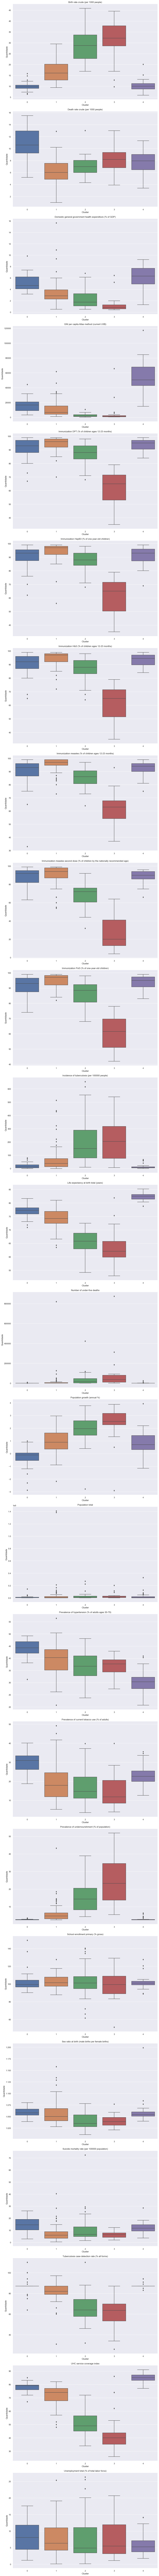

In [84]:
# Boxplot dos indicadores em cada cluster
variaveis = df_final.columns[:-3]
fig, axs = plt.subplots(len(variaveis), 1, figsize=(12, 8*len(variaveis)))

# Transformando o array de subplots em uma lista única
axs = axs.flatten()

# Loop sobre as variáveis para criar boxplots
for i, variavel in enumerate(variaveis):
    sns.boxplot(x=df_final['cluster'], y=variavel, data=df_final, ax=axs[i])
    axs[i].set_title(f'{variavel}')
    axs[i].set_xlabel('Cluster')
    axs[i].set_ylabel('Quantidade')

# Ajustando o layout
plt.tight_layout()
plt.show()

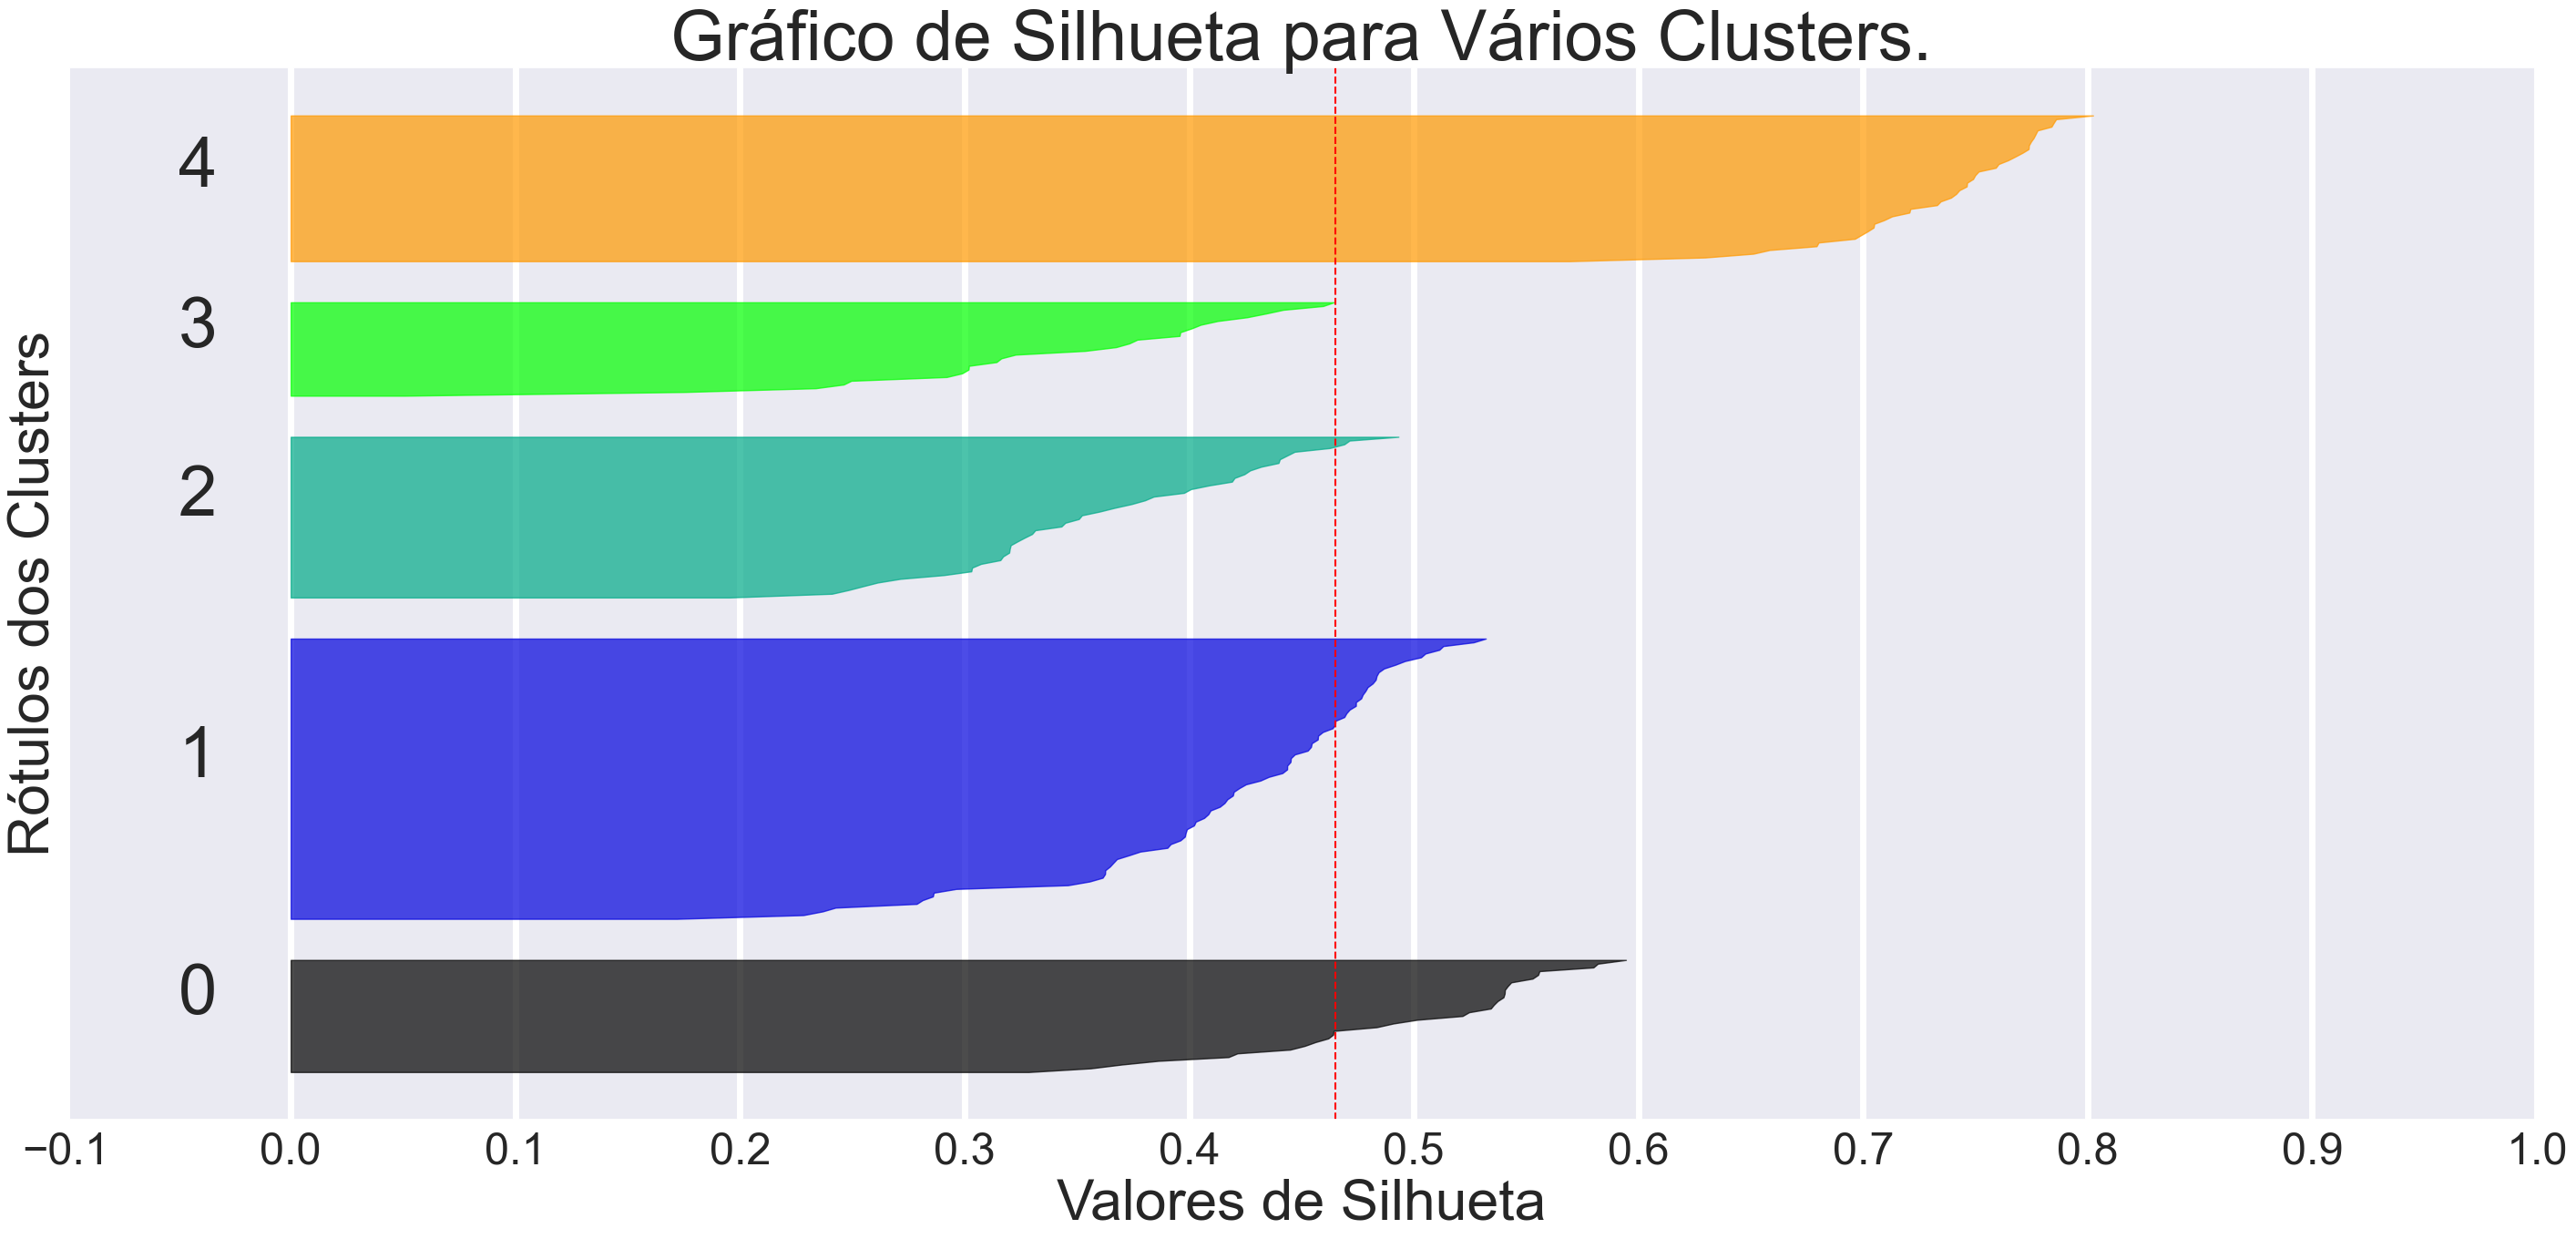

In [85]:
# Método da silhueta
silhouette_avg = silhouette_score(df_completa, df_completa['cluster'])

# Calcular as silhuetas para cada ponto
sample_silhouette_values = silhouette_samples(df_completa, df_completa['cluster'])

# Plotar as silhuetas
fig, ax = plt.subplots(1, 1)
n_clusters = 5
y_lower = 10
for i in range(n_clusters):
    # Agregar as silhuetas para amostras pertencentes a um determinado cluster e classificá-las
    ith_cluster_silhouette_values = \
    sample_silhouette_values[df_completa['cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Rótulos, no meio
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=55)
    # Calcular o novo y_lower para o próximo plot
    y_lower = y_upper + 10  

ax.set_title("Gráfico de Silhueta para Vários Clusters.", fontsize=55)
ax.set_xlabel("Valores de Silhueta", fontsize=45)
ax.set_ylabel("Rótulos dos Clusters", fontsize=45)
ax.xaxis.grid(True, linewidth=5)
ax.yaxis.grid(False)

# A linha vertical para a média da silhueta de todos os valores
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.tick_params(axis='x', labelsize=35)


ax.set_yticks([])  # Limpar os rótulos
ax.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

In [86]:
print(silhouette_avg)

0.465191627437355
